## Day 4: Scratchcards

The gondola takes you up. Strangely, though, the ground doesn't seem to be coming with you; you're not climbing a mountain. As the circle of Snow Island recedes below you, an entire new landmass suddenly appears above you! The gondola carries you to the surface of the new island and lurches into the station.

As you exit the gondola, the first thing you notice is that the air here is much warmer than it was on Snow Island. It's also quite humid. Is this where the water source is?

The next thing you notice is an Elf sitting on the floor across the station in what seems to be a pile of colorful square cards.

"Oh! Hello!" The Elf excitedly runs over to you. "How may I be of service?" You ask about water sources.

"I'm not sure; I just operate the gondola lift. That does sound like something we'd have, though - this is Island Island, after all! I bet the gardener would know. He's on a different island, though - er, the small kind surrounded by water, not the floating kind. We really need to come up with a better naming scheme. Tell you what: if you can help me with something quick, I'll let you borrow my boat and you can go visit the gardener. I got all these scratchcards as a gift, but I can't figure out what I've won."

The Elf leads you over to the pile of colorful cards. There, you discover dozens of scratchcards, all with their opaque covering already scratched off. Picking one up, it looks like each card has two lists of numbers separated by a vertical bar (|): a list of winning numbers and then a list of numbers you have. You organize the information into a table (your puzzle input).

As far as the Elf has been able to figure out, you have to figure out which of the numbers you have appear in the list of winning numbers. The first match makes the card worth one point and each match after the first doubles the point value of that card.

For example:
    
    Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
    Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
    Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
    Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
    Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
    Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11 
    
In the above example, card 1 has five winning numbers (41, 48, 83, 86, and 17) and eight numbers you have (83, 86, 6, 31, 17, 9, 48, and 53). Of the numbers you have, four of them (48, 83, 17, and 86) are winning numbers! That means :

- Card 1 is worth 8 points (1 for the first match, then doubled three times for each of the three matches after the first).
- Card 2 has two winning numbers (32 and 61), so it is worth 2 points.
- Card 3 has two winning numbers (1 and 21), so it is worth 2 points.
- Card 4 has one winning number (84), so it is worth 1 point.
- Card 5 has no winning numbers, so it is worth no points.
- Card 6 has no winning numbers, so it is worth no points.

So, in this example, the Elf's pile of scratchcards is worth 13 points.

Take a seat in the large pile of colorful cards. How many points are they worth in total?
    

### Test

In [1]:
# load in sample puzzle input
file_path = 'data/day4test.txt' 

try:
    with open(file_path, 'r') as file:
        scratchcard_test = file.read()
except FileNotFoundError:
    print(f"File not found: {file_path}")
    scratchcard_test = None

In [2]:
print(scratchcard_test)

Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11


In [3]:
input_line = 'Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53'

In [5]:
import re

sum_of_scratchcards_test = 0

for line in scratchcard_test.split('\n'):
    
    card_winning_numbers = line.split('|')[0].strip()
    winning_numbers = card_winning_numbers.split(':')[1].strip()
    winning_numbers_set = set(map(int, winning_numbers.split()))
 
    my_numbers = line.split('|')[1].strip() 
    my_numbers_set = set(map(int, my_numbers.split()))
    
    matching_numbers_set = winning_numbers_set & my_numbers_set
    
    matching_numbers = list(matching_numbers_set)
    n = len(matching_numbers)
   
    if n>0:
        sum_of_scratchcards_test += 2**(n-1)
    else:
        sum_of_scratchcards_test == sum_of_scratchcards_test
      
print(f'The pile of scratchcards are worth {sum_of_scratchcards_test} points.')
if sum_of_scratchcards_test == 13:
    print("Test passed!")
else:
    print("Sorry. Wrong answer. Keep trying!")

The pile of scratchcards are worth 13 points.
Test passed!


### Attempted Solution

In [6]:
# load in sample puzzle input
file_path = 'data/scratchcards.txt' 

try:
    with open(file_path, 'r') as file:
        scratchcards = file.read()
except FileNotFoundError:
    print(f"File not found: {file_path}")
    scratchcards = None

In [7]:
print(scratchcards)

Card   1: 59 65 20 66 55 92 43 23 98 70 | 99 81 56 30 88 55 57 11 90 45 53 28 33 20 84 54 24 64 74 98 36 77 61 82 69
Card   2: 62 76 53 69 70 72 81  1 67 78 | 62 24 60 72 67 76 25 46 40 26 28 57 69 70 78 79 81  1 11 15 30 63 68 37 53
Card   3: 87 81  7 92 88 66 58 22 13 59 | 42 18 31 11 17 62 46 52 22 48 83 99 93  2 26 28 88  4 56 20 25 43 82 89 44
Card   4: 13 92 15 50 49 10 58 44 84 81 | 69 16  2 58 27 49 67 31 47 53 35 89 75 20 96 44 50 92  3 98 15 81 84 13 10
Card   5: 49 18 23 93 19 52 76 15 86 72 | 18 62 86 49 93 52 43 22 23 35 76 25 79 31 15 10 32 47 72 98 19 71 81 13 39
Card   6: 49 22 40 83 92 30 16 96 80 93 | 30  5 93 66 49 10 83 55 22  6 40 43 80 84 29 74 34 16 39 31 92 56 96 68 65
Card   7: 68 50 47 21  2 34  5 44 70 93 |  5  2 37 83 13 25 82 44 90 34 22 16 14 52 50 68 77 75 70 21 31 64 93 47 88
Card   8: 93 39 80 58 10 50 47 81 20  4 | 30  4 55 36 68 39 90 20 81  7 58 93 13 47 85 10  8 96 11 80 99 91 50 72 51
Card   9: 55 66 20 93 39 53 81 60 33 17 | 67 25 55 24 81 58 66 1

In [8]:
import re

sum_of_scratchcards = 0

for line in scratchcards.split('\n'):
    
    card_winning_numbers = line.split('|')[0].strip()
    winning_numbers = card_winning_numbers.split(':')[1].strip()
    winning_numbers_set = set(map(int, winning_numbers.split()))
 
    my_numbers = line.split('|')[1].strip() 
    my_numbers_set = set(map(int, my_numbers.split()))
    
    matching_numbers_set = winning_numbers_set & my_numbers_set
    
    matching_numbers = list(matching_numbers_set)
    n = len(matching_numbers)
   
    if n>0:
        sum_of_scratchcards += 2**(n-1)
    else:
        sum_of_scratchcards == sum_of_scratchcards
      
print(f'The pile of scratchcards are worth {sum_of_scratchcards} points.')

The pile of scratchcards are worth 18519 points.


### Part Two

Just as you're about to report your findings to the Elf, one of you realizes that the rules have actually been printed on the back of every card this whole time.

There's no such thing as "points". Instead, scratchcards only cause you to win more scratchcards equal to the number of winning numbers you have.

Specifically, you win copies of the scratchcards below the winning card equal to the number of matches. So, if card 10 were to have 5 matching numbers, you would win one copy each of cards 11, 12, 13, 14, and 15.

Copies of scratchcards are scored like normal scratchcards and have the same card number as the card they copied. So, if you win a copy of card 10 and it has 5 matching numbers, it would then win a copy of the same cards that the original card 10 won: cards 11, 12, 13, 14, and 15. This process repeats until none of the copies cause you to win any more cards. (Cards will never make you copy a card past the end of the table.)

This time, the above example goes differently:

    Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
    Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
    Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
    Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
    Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
    Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11
    
- Card 1 has four matching numbers, so you win one copy each of the next four cards: cards 2, 3, 4, and 5.
- Your original card 2 has two matching numbers, so you win one copy each of cards 3 and 4.
- Your copy of card 2 also wins one copy each of cards 3 and 4.
- Your four instances of card 3 (one original and three copies) have two matching numbers, so you win four copies each of cards 4 and 5.
- Your eight instances of card 4 (one original and seven copies) have one matching number, so you win eight copies of card 5.
- Your fourteen instances of card 5 (one original and thirteen copies) have no matching numbers and win no more cards.
- Your one instance of card 6 (one original) has no matching numbers and wins no more cards.

Once all of the originals and copies have been processed, you end up with 1 instance of card 1, 2 instances of card 2, 4 instances of card 3, 8 instances of card 4, 14 instances of card 5, and 1 instance of card 6. In total, this example pile of scratchcards causes you to ultimately have 30 scratchcards!

Process all of the original and copied scratchcards until no more scratchcards are won. Including the original set of scratchcards, how many total scratchcards do you end up with?

In [9]:
# load in sample puzzle input
file_path = 'data/day4test.txt' 

try:
    with open(file_path, 'r') as file:
        scratchcards_test = file.read()
except FileNotFoundError:
    print(f"File not found: {file_path}")
    scratchcards_test = None

In [10]:
print(scratchcards_test)

Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11


In [19]:
original_cards = 0
matching = 0
number_matching_numbers = []

for line in scratchcards_test.split('\n'):
      
    # calculate number of cards
    original = len(line[0])  
    original_cards += original
    
    # calculate numer of matching numbers
    card_winning_numbers = line.split('|')[0].strip()
    winning_numbers = card_winning_numbers.split(':')[1].strip()
    card_winning_numbers = line.split('|')[0].strip()
    winning_numbers = card_winning_numbers.split(':')[1].strip()
    winning_numbers_set = set(map(int, winning_numbers.split()))
 
    my_numbers = line.split('|')[1].strip() 
    my_numbers_set = set(map(int, my_numbers.split()))
    
    matching_numbers_set = winning_numbers_set & my_numbers_set
    
    matching = list(matching_numbers_set)
    number_matching_numbers.append(len(matching))
    print(number_matching_numbers)
  
def process_scratchcards(original_cards):
    card_count = [0] * len(original_cards)
    total_cards = 0

    for i in range(len(original_cards)):
        matching_numbers = original_cards[i]
        card_count[i] += 1  # Add one instance of the current card
        total_cards += 1

        # Process copy cards won based on matching numbers
        for j in range(i + 1, min(i + 1 + matching_numbers, len(original_cards))):
            card_count[j] += 2 ** i  # Add copies based on matching numbers
            total_cards += 2 ** i

    return card_count, total_cards

# Process the scratchcards
result, total_scratchcards = process_scratchcards(number_matching_numbers)

# Display the final count of each card
for i, count in enumerate(result):
    print(f"Card {i + 1}: {count} instances")

# Calculate the total number of scratchcards
print(f"\nTotal scratchcards: {total_scratchcards}")

if total_scratchcards == 30:
    print("Test passed!")
else:
    print("Sorry. Wrong answer. Keep trying!")

[4]
[4, 2]
[4, 2, 2]
[4, 2, 2, 1]
[4, 2, 2, 1, 0]
[4, 2, 2, 1, 0, 0]
Card 1: 1 instances
Card 2: 2 instances
Card 3: 4 instances
Card 4: 8 instances
Card 5: 14 instances
Card 6: 1 instances

Total scratchcards: 30
Test passed!


### Attempted Solution

In [12]:
# load in sample puzzle input
file_path = 'data/scratchcards.txt' 

try:
    with open(file_path, 'r') as file:
        scratchcards = file.read()
except FileNotFoundError:
    print(f"File not found: {file_path}")
    scratchcards = None

In [22]:
original_cards = 0
matching = 0
number_matching_numbers = []

for line in scratchcards.split('\n'):
      
    # calculate number of cards
    original = len(line[0])  
    original_cards += original
    
    # calculate numer of matching numbers
    card_winning_numbers = line.split('|')[0].strip()
    winning_numbers = card_winning_numbers.split(':')[1].strip()
    card_winning_numbers = line.split('|')[0].strip()
    winning_numbers = card_winning_numbers.split(':')[1].strip()
    winning_numbers_set = set(map(int, winning_numbers.split()))
 
    my_numbers = line.split('|')[1].strip() 
    my_numbers_set = set(map(int, my_numbers.split()))
    
    matching_numbers_set = winning_numbers_set & my_numbers_set
    
    matching = list(matching_numbers_set)
    number_matching_numbers.append(len(matching))
  
def process_scratchcards(original_cards):
    card_count = [0] * len(original_cards)
    total_cards = 0

    for i in range(len(original_cards)):
        matching_numbers = original_cards[i]
        card_count[i] += 1  # Add one instance of the current card
        total_cards += 1

        # Process copy cards won based on matching numbers
        for j in range(i + 1, min(i + 1 + matching_numbers, len(original_cards))):
            card_count[j] += card_count[i]  # Add copies based on matching numbers of the previous card
            total_cards += card_count[i]
            total_cards += card_count[i]

    return card_count, total_cards

# Process the scratchcards
result, total_scratchcards = process_scratchcards(number_matching_numbers)

# Display the final count of each card
for i, count in enumerate(result):
    print(f"Card {i + 1}: {count} instances")
    
# Calculate the total number of scratchcards
print(f"\nTotal scratchcards: {total_scratchcards}")

Card 1: 1 instances
Card 2: 2 instances
Card 3: 4 instances
Card 4: 8 instances
Card 5: 15 instances
Card 6: 26 instances
Card 7: 52 instances
Card 8: 104 instances
Card 9: 208 instances
Card 10: 416 instances
Card 11: 832 instances
Card 12: 1664 instances
Card 13: 3326 instances
Card 14: 6652 instances
Card 15: 6644 instances
Card 16: 13273 instances
Card 17: 26520 instances
Card 18: 51324 instances
Card 19: 102544 instances
Card 20: 178360 instances
Card 21: 346334 instances
Card 22: 64598 instances
Card 23: 64599 instances
Card 24: 1 instances
Card 25: 2 instances
Card 26: 4 instances
Card 27: 8 instances
Card 28: 16 instances
Card 29: 32 instances
Card 30: 64 instances
Card 31: 128 instances
Card 32: 128 instances
Card 33: 252 instances
Card 34: 312 instances
Card 35: 623 instances
Card 36: 1236 instances
Card 37: 1833 instances
Card 38: 3666 instances
Card 39: 5187 instances
Card 40: 10342 instances
Card 41: 17018 instances
Card 42: 32800 instances
Card 43: 38240 instances
Card 44

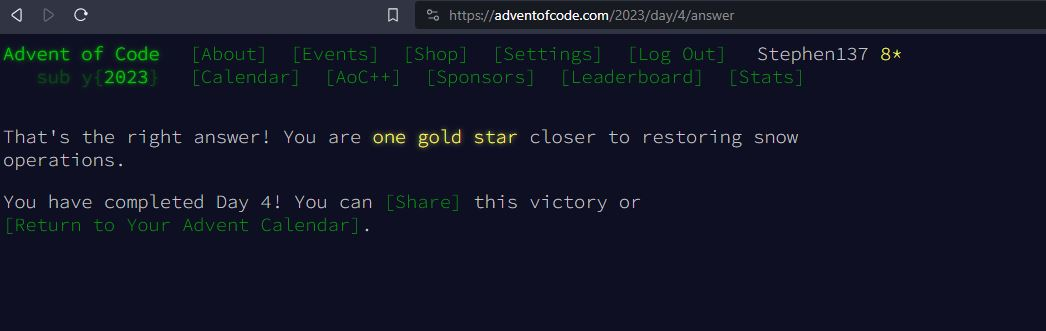